# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import hashlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

#  Download the CSV File:

In [2]:
df = pd.read_csv("Sample-Superstore.csv", encoding='latin-1')

# CLeaning the Data

In [3]:
print(df.shape)

(9994, 21)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [7]:
# Summary statistics for numerical columns
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='ISO8601')

In [10]:
# #df['Sales'] = df['Sales'].astype(float)
# df['Sales'] = df['Sales'].astype(float)
# df['Profit'] = df['Profit'].astype(float) 
# df['Quantity'] = df['Quantity'].astype(int)

In [11]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Create New Features 

In [12]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [14]:
# change the column types to the appropriate data types
# Identify potential columns and convert them to the appropriate data types
# Adjust these based on the actual columns in your dataset
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])

if 'Ship Date' in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])

if 'Sales' in df.columns:
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  # Convert to numeric, handle errors

if 'Quantity' in df.columns:
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce', downcast='integer')

if 'Discount' in df.columns:
    df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

if 'Profit' in df.columns:
    df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

if 'Postal Code' in df.columns:
    df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce', downcast='integer')

# Convert categorical columns to 'category' type
categorical_cols = ['Segment', 'Country', 'City', 'State', 'Category', 'Sub-Category', 'Product Name', 'Ship Mode', 'Customer ID', 'Customer Name', 'Region'] #Add or remove columns as needed
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Display the data types of the columns after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID            category
Customer Name          category
Segment                category
Country                category
City                   category
State                  category
Postal Code               int32
Region                 category
Product ID               object
Category               category
Sub-Category           category
Product Name           category
Sales                   float64
Quantity                   int8
Discount                float64
Profit                  float64
Month                     int32
Year                      int32
dtype: object


In [15]:
# Calculate the unit price (assuming 'Sales' and 'Quantity' columns exist)
# df['UnitPrice'] = df['Sales'] / (df['Quantity'] * (1-df['Discount']))

# Display the DataFrame with the new UnitPrice column
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,2016
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,2016
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,2016
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,2015
4,5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,2015


In [16]:
# Get unique categories
unique_categories = df['Category'].unique()

# Create a mapping of category names to IDs
category_id_mapping = {category: idx + 1 for idx, category in enumerate(unique_categories)}

# Add a Category ID column to the DataFrame
df['Category ID'] = df['Category'].map(category_id_mapping)
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Category ID
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,1


In [17]:
# df['AddressID'] = range(1, len(df_Address) + 1)
# df_Address['Full Address'] = df['Country'] + ' ' + df['City'].fillna('') + ' ' + df['State'] + ' ' + df['Postal Code'].fillna('').astype(str) + ' ' + df['Region']
# df_Address = df_Address.drop(["Country", "City", "State", "Postal Code", "Region"],axis=1)

In [18]:
# def generate_address_id(city, state, postal_code, country=""):
#     """Generates an Address ID using SHA256 hashing."""
#     address_string = f"{city}-{state}-{postal_code}-{country}".encode('utf-8')
#     address_hash = hashlib.sha256(address_string).hexdigest()
#     return address_hash

# def process_sales_data(csv_file, db_file):
#     """Processes sales data from a CSV, creates Address IDs, and inserts into tables."""
#     df = pd.read_csv(csv_file)

#     # Create Address IDs
#     df['AddressID'] = df.apply(lambda row: generate_address_id(row['City'], row['State'], row['Postal Code'], row['Country']), axis=1)

In [19]:
df1= df.copy()
df1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Category ID
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,1
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,1


# Exploratory Data Analysis (EDA):
# Univariate Analysis:

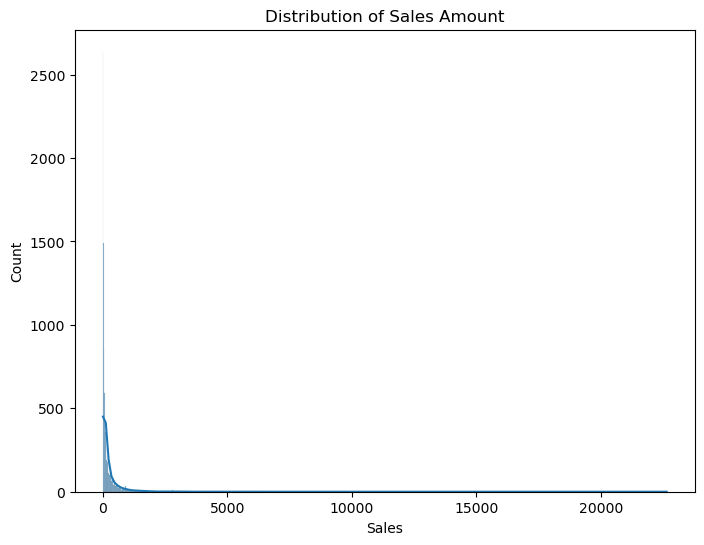

In [20]:
#Histogram for sales amount
plt.figure(figsize=(8, 6))
sns.histplot(df1['Sales'], kde=True)
plt.title('Distribution of Sales Amount')
plt.show()


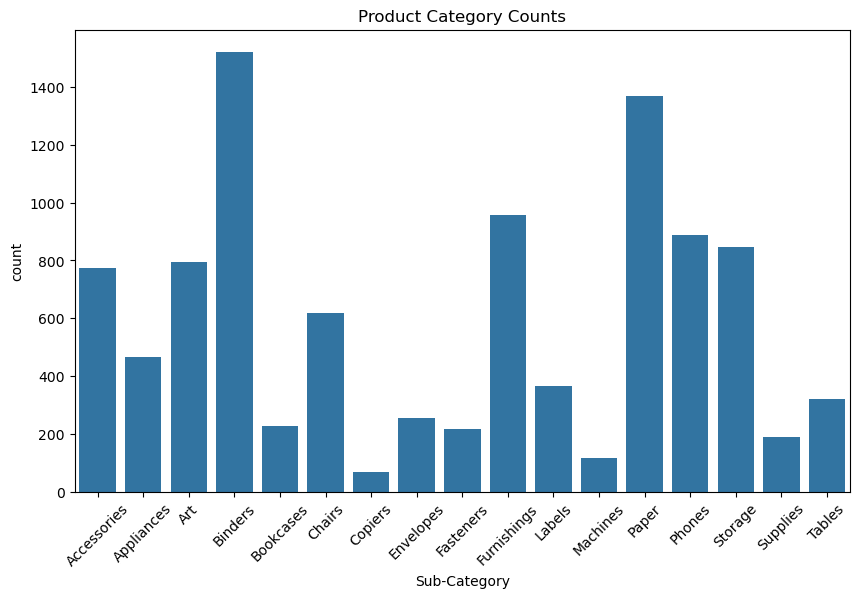

In [21]:
# Bar chart for product categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Sub-Category', data=df1)
plt.title('Product Category Counts')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Profit Per Catagory')

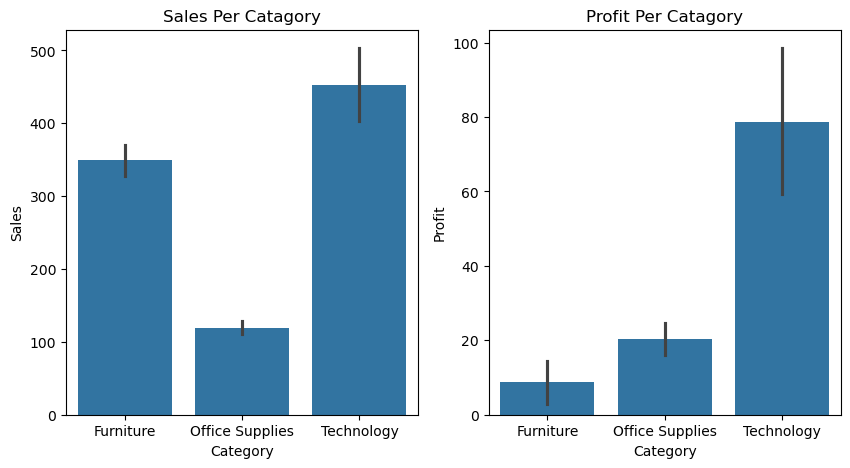

In [22]:
# Sales each catogery
plt.figure(figsize=(10,5))
plt.subplot (1,2,1)
sns.barplot(data=df , x= 'Category', y= 'Sales')
plt.title('Sales Per Catagory')
plt.subplot (1,2,2)
sns.barplot(data=df , x='Category', y='Profit')
plt.title('Profit Per Catagory')

In [23]:
def generate_address_id(city, state, postal_code, country=""):
    """Generates an Address ID using SHA256 hashing."""
    address_string = f"{city}-{state}-{postal_code}-{country}".encode('utf-8')
# Create Address IDs
df['AddressID'] = df.apply(lambda row: generate_address_id(row['City'], row['State'], row['Postal Code'], row['Country']), axis=1)

# Connect to the database

In [24]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Category ID,AddressID
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,1,None
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,1,None


# LMS
# Epic 4: Perform some queries

In [25]:
#Category with Maximum Sales Revenue:
category_sales = df1.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Category with Maximum Sales Revenue:")
print(category_sales.head(1))

Category with Maximum Sales Revenue:
Category
Technology    836154.033
Name: Sales, dtype: float64


In [26]:
#  Profit in the Maximum Sales Category:
if 'Profit' in df1.columns:
    max_sales_category = category_sales.index[0]
    category_profit = df1[df1['Category'] == max_sales_category]['Profit'].sum()
    print(f"Profit in {max_sales_category}: {category_profit}")

Profit in Technology: 145454.9481


In [27]:
# Loss in Any Categories:
if 'Profit' in df1.columns:
    category_profits = df1.groupby('Category')['Profit'].sum()
    loss_categories = category_profits[category_profits > 0]
    print("Categories with Loss:")
    print(loss_categories)

Categories with Loss:
Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [28]:
# Top 5 States by Sales Revenue (Maximum and Minimum):
state_sales = df1.groupby('State')['Sales'].sum().sort_values()
print("Top 5 States by Sales Revenue (Minimum):")
print(state_sales.head(5))
print("\nTop 5 States by Sales Revenue (Maximum):")
print(state_sales.tail(5))


Top 5 States by Sales Revenue (Minimum):
State
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Sales, dtype: float64

Top 5 States by Sales Revenue (Maximum):
State
Pennsylvania    116511.9140
Washington      138641.2700
Texas           170188.0458
New York        310876.2710
California      457687.6315
Name: Sales, dtype: float64


In [29]:
#  Top 3 Products in Each Product Segment by Sales:
def top_products_by_sales(group):
    return group.sort_values(by='Sales', ascending=False).head(3)

top_products_segment_sales = df1.groupby('Segment').apply(top_products_by_sales)
print("\nTop 3 Products in Each Segment by Sales:")
print(top_products_segment_sales[['Product Name', 'Sales']])


Top 3 Products in Each Segment by Sales:
                                                       Product Name      Sales
Segment                                                                       
Consumer    8153              Canon imageCLASS 2200 Advanced Copier  13999.960
            4190              Canon imageCLASS 2200 Advanced Copier  10499.970
            9039   GBC Ibimaster 500 Manual ProClick Binding System   9892.740
Corporate   6826              Canon imageCLASS 2200 Advanced Copier  17499.950
            4277   3D Systems Cube Printer, 2nd Generation, Magenta   9099.930
            683           Cubify CubeX 3D Printer Triple Head Print   7999.980
Home Office 2697  Cisco TelePresence System EX90 Videoconferenci...  22638.480
            2623              Canon imageCLASS 2200 Advanced Copier  11199.968
            7666               Hewlett Packard LaserJet 3310 Copier   5399.910


In [30]:
# Are they the Top 3 Profitable Products?
if 'Profit' in df1.columns:
    def top_products_by_profit(group):
        return group.sort_values(by='Profit', ascending=False).head(3)

    top_products_segment_profit = df1.groupby('Segment').apply(top_products_by_profit)

    for segment in df1['Segment'].unique():
        sales_products = top_products_segment_sales.loc[segment]['Product Name'].tolist()
        profit_products = top_products_segment_profit.loc[segment]['Product Name'].tolist()
        print(f"\nSegment: {segment}")
        print(f"Top Sales Products: {sales_products}")
        print(f"Top Profit Products: {profit_products}")
        if sales_products == profit_products:
            print("The top sales products are also the top profit products.")
        else:
            print("The top sales products are NOT the top profit products.")


Segment: Consumer
Top Sales Products: ['Canon imageCLASS 2200 Advanced Copier', 'Canon imageCLASS 2200 Advanced Copier', 'GBC Ibimaster 500 Manual ProClick Binding System']
Top Profit Products: ['Canon imageCLASS 2200 Advanced Copier', 'Canon imageCLASS 2200 Advanced Copier', 'GBC Ibimaster 500 Manual ProClick Binding System']
The top sales products are also the top profit products.

Segment: Corporate
Top Sales Products: ['Canon imageCLASS 2200 Advanced Copier', '3D Systems Cube Printer, 2nd Generation, Magenta', 'Cubify CubeX 3D Printer Triple Head Print']
Top Profit Products: ['Canon imageCLASS 2200 Advanced Copier', '3D Systems Cube Printer, 2nd Generation, Magenta', 'Canon PC1060 Personal Laser Copier']
The top sales products are NOT the top profit products.

Segment: Home Office
Top Sales Products: ['Cisco TelePresence System EX90 Videoconferencing Unit', 'Canon imageCLASS 2200 Advanced Copier', 'Hewlett Packard LaserJet 3310 Copier']
Top Profit Products: ['Canon imageCLASS 2200

In [31]:
# Top 3 Best-Seller Products in Each Segment (Quantity):
def top_products_by_quantity(group):
    return group.sort_values(by='Quantity', ascending=False).head(3)

top_products_segment_quantity = df1.groupby('Segment').apply(top_products_by_quantity)
print("\nTop 3 Best-Seller Products in Each Segment (Quantity):")
print(top_products_segment_quantity[['Product Name', 'Quantity']])



Top 3 Best-Seller Products in Each Segment (Quantity):
                                                       Product Name  Quantity
Segment                                                                      
Consumer    6628                  PureGear Roll-On Screen Protector        14
            660           Space Solutions Commercial Steel Shelving        14
            113            OIC Colored Binder Clips, Assorted Sizes        14
Corporate   2793                                      Pyle PMP37LED        14
            8935                     Logitech Wireless Headset h800        14
            1363                   Cardinal EasyOpen D-Ring Binders        14
Home Office 9979                  Ibico Recycled Linen-Style Covers        14
            2947  Wilson Jones Clip & Carry Folder Binder Tool f...        14
            8521                              Ultra Door Push Plate        14


In [32]:
Best =top_products_segment_quantity.copy()
Best.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
Segment                                                                        
Consumer  6628    6629  CA-2015-135489 2015-09-19 2015-09-22    Second Class   
          660      661  CA-2015-146563 2015-08-24 2015-08-28  Standard Class   
          113      114  CA-2014-115259 2014-08-25 2014-08-27    Second Class   
Corporate 2793    2794  CA-2014-154599 2014-12-04 2014-04-17  Standard Class   
          8935    8936  CA-2017-130036 2017-08-27 2017-08-27        Same Day   

               Customer ID      Customer Name    Segment        Country  \
Segment                                                                   
Consumer  6628    GW-14605   Giulietta Weimer   Consumer  United States   
          660     CB-12025  Cassandra Brandow   Consumer  United States   
          113     RC-19960         Ryan Crowe   Consumer  United States   
Corporate 2793    KN-16450        Kean Nguyen  Corporate  United States   
          8935    BP-11185       Ben Peterman  Corporate  United States   

                         City  ...         Category  Sub-Category  \
Segment                        ...                                  
Consumer  6628  New York City  ...       Technology        Phones   
          660       Arlington  ...  Office Supplies       Storage   
          113        Columbus  ...  Office Supplies     Fasteners   
Corporate 2793  Redondo Beach  ...       Technology        Phones   
          8935   Philadelphia  ...       Technology   Accessories   

                                             Product Name     Sales Quantity  \
Segment                                                                        
Consumer  6628          PureGear Roll-On Screen Protector   279.860       14   
          660   Space Solutions Commercial Steel Shelving   724.080       14   
          113    OIC Colored Binder Clips, Assorted Sizes    40.096       14   
Corporate 2793                              Pyle PMP37LED  1075.088       14   
          8935             Logitech Wireless Headset h800  1119.888       14   

               Discount    Profit  Month  Year  Category ID  
Segment                                                      
Consumer  6628      0.0  134.3328      9  2015            3  
          660       0.2 -135.7650      8  2015            2  
          113       0.2   14.5348      8  2014            2  
Corporate 2793      0.2   94.0702     12  2014            3  
          8935      0.2  209.9790      8  2017            3  

[5 rows x 24 columns]

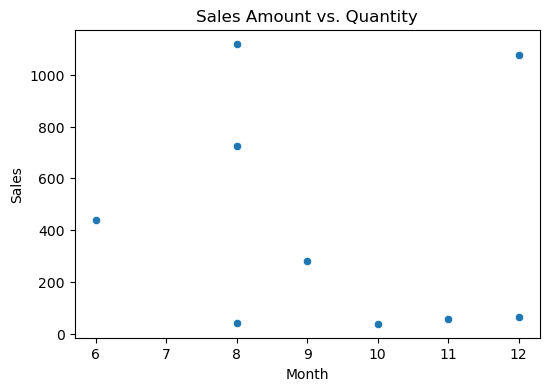

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Month', y='Sales', data= Best)
plt.title('Sales Amount vs. Quantity')
plt.show()

In [34]:
# Top 3 Worst-Selling Products in Each Category (Quantity):
def worst_products_by_quantity(group):
    return group.sort_values(by='Quantity').head(3)

worst_products_category_quantity = df1.groupby('Category').apply(worst_products_by_quantity)
print("\nTop 3 Worst-Selling Products in Each Category (Quantity):")
print(worst_products_category_quantity[['Product Name', 'Quantity']])


Top 3 Worst-Selling Products in Each Category (Quantity):
                                                           Product Name  \
Category                                                                  
Furniture       1354         Bretford Rectangular Conference Table Tops   
                5826  Office Star Flex Back Scooter Chair with Alumi...   
                5830                Global Stack Chair with Arms, Black   
Office Supplies 4238  Boston 1827 Commercial Additional Cutter, Driv...   
                8238  REDIFORM Incoming/Outgoing Call Register, 11" ...   
                2166                                         Newell 334   
Technology      2538                Nortel Meridian M5316 Digital phone   
                8018  Panasonic KX-TG6844B Expandable Digital Cordle...   
                5814               Belkin Standard 104 key USB Keyboard   

                      Quantity  
Category                        
Furniture       1354         1  
                

In [35]:
Worst = worst_products_category_quantity.copy()
Worst.head(3)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
Category                                                                       
Furniture 1354    1355  CA-2017-162978 2017-04-05 2017-05-09  Standard Class   
          5826    5827  CA-2017-161067 2017-03-09 2017-09-06    Second Class   
          5830    5831  CA-2016-122063 2016-03-12 2016-12-07  Standard Class   

               Customer ID     Customer Name      Segment        Country  \
Category                                                                   
Furniture 1354    LW-16990  Lindsay Williams    Corporate  United States   
          5826    KB-16405  Katrina Bavinger  Home Office  United States   
          5830    MM-17920     Michael Moore     Consumer  United States   

                         City  ...   Category  Sub-Category  \
Category                       ...                            
Furniture 1354  San Francisco  ...  Furniture        Tables   
          5826  New York City  ...  Furniture        Chairs   
          5830       Richmond  ...  Furniture        Chairs   

                                                     Product Name    Sales  \
Category                                                                     
Furniture 1354         Bretford Rectangular Conference Table Tops  300.904   
          5826  Office Star Flex Back Scooter Chair with Alumi...   90.801   
          5830                Global Stack Chair with Arms, Black   29.980   

               Quantity Discount   Profit  Month  Year  Category ID  
Category                                                             
Furniture 1354        1      0.2  11.2839      4  2017            1  
          5826        1      0.1  14.1246      3  2017            1  
          5830        1      0.0   8.0946      3  2016            1  

[3 rows x 24 columns]

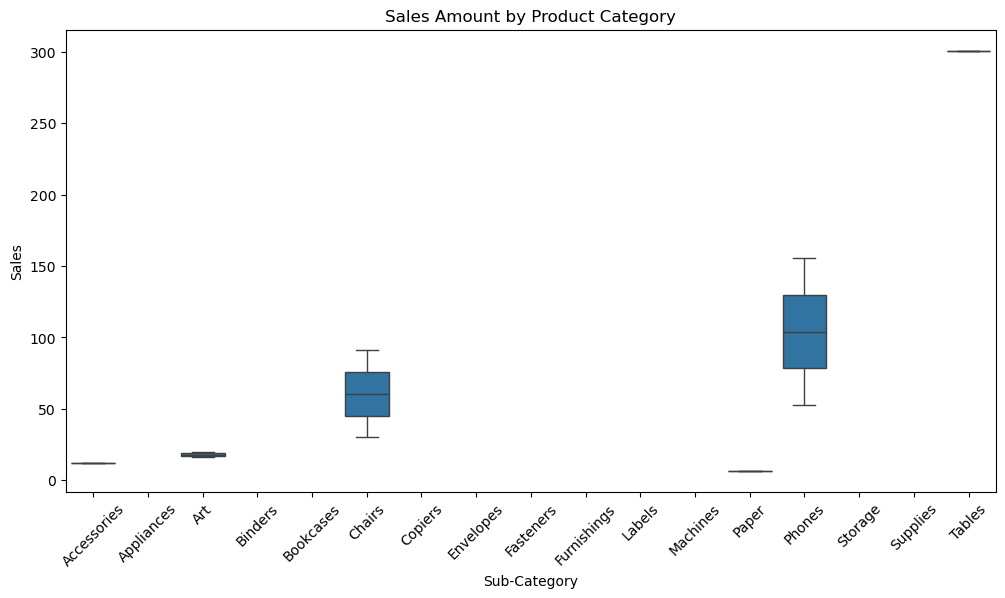

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data= Worst)
plt.title('Sales Amount by Product Category')
plt.xticks(rotation=45)
plt.show()

In [37]:
categories = ["Accessories", "Appliances", "Art", "Binders", "Bookcases", "chairs", "copiers", "Envelopes", "Fasteners","Furnishings" ,"Labels" ,"Machines", "Paper", "Phones", "Storage", "Supplies", "Tables" ]
category_ids = {category: f"CAT_{i:03d}" for i, category in enumerate(categories)}
# Output: {'Electronics': 'CAT_000', 'Clothing': 'CAT_001', ...}

In [38]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Year', 'Category ID'],
      dtype='object')

In [39]:
# Unique Customers per Month for 2016:
customers_2016 = df1[df1['Year'] == 2016]
unique_customers_per_month = customers_2016.groupby('Month')['Customer ID'].nunique()
print("\nUnique Customers per Month for 2016:")
print(unique_customers_per_month)


Unique Customers per Month for 2016:
Month
1      73
2      56
3      91
4      91
5     111
6      84
7      97
8     106
9     129
10    110
11    135
12    126
Name: Customer ID, dtype: int64


# Further Analysis

In [40]:
df1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Category ID
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,1
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,1


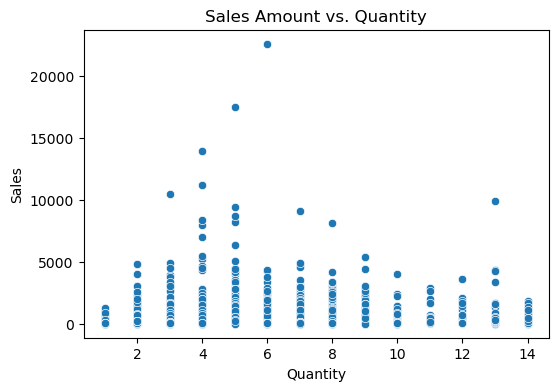

In [41]:
#Scatter plot of sales amount vs. quantity
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Quantity', y='Sales', data=df1)
plt.title('Sales Amount vs. Quantity')
plt.show()

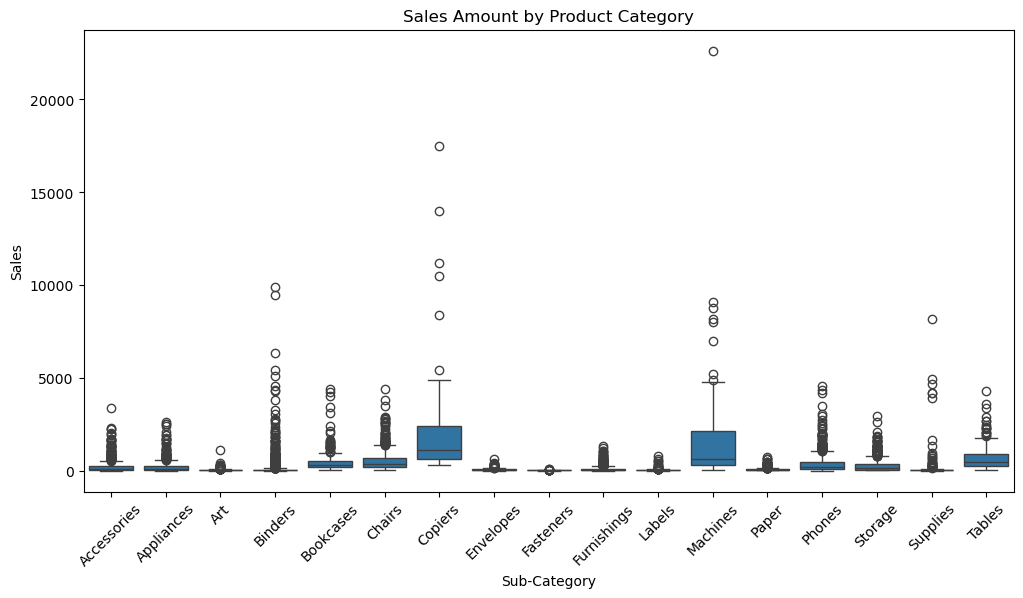

In [42]:
# Box plot of sales amount by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df1)
plt.title('Sales Amount by Product Category')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Heatmap of numerical column correlations.
# plt.figure(figsize = (10,8))
# sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
# plt.show()

# Time Series Analysis

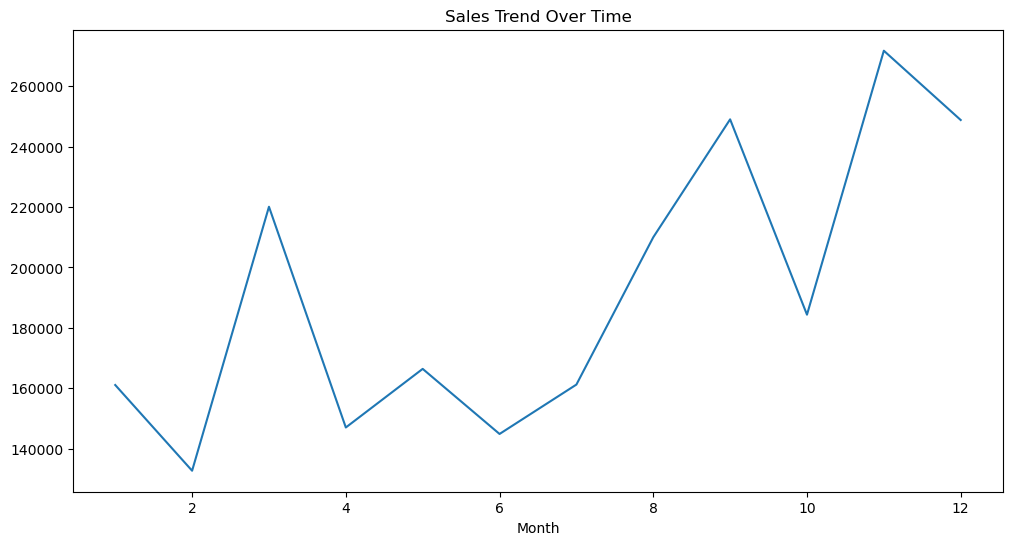

In [44]:
# Line plot of sales over time
plt.figure(figsize=(12, 6))
df1.groupby('Month')['Sales'].sum().plot()
plt.title('Sales Trend Over Time')
plt.show()

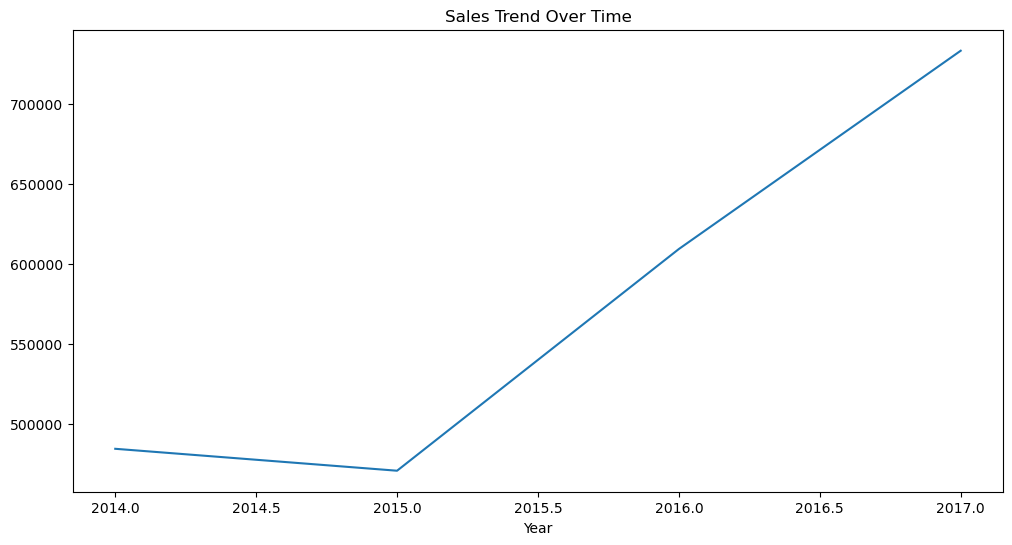

In [45]:
plt.figure(figsize=(12, 6))
df1.groupby('Year')['Sales'].sum().plot()
plt.title('Sales Trend Over Time')
plt.show()

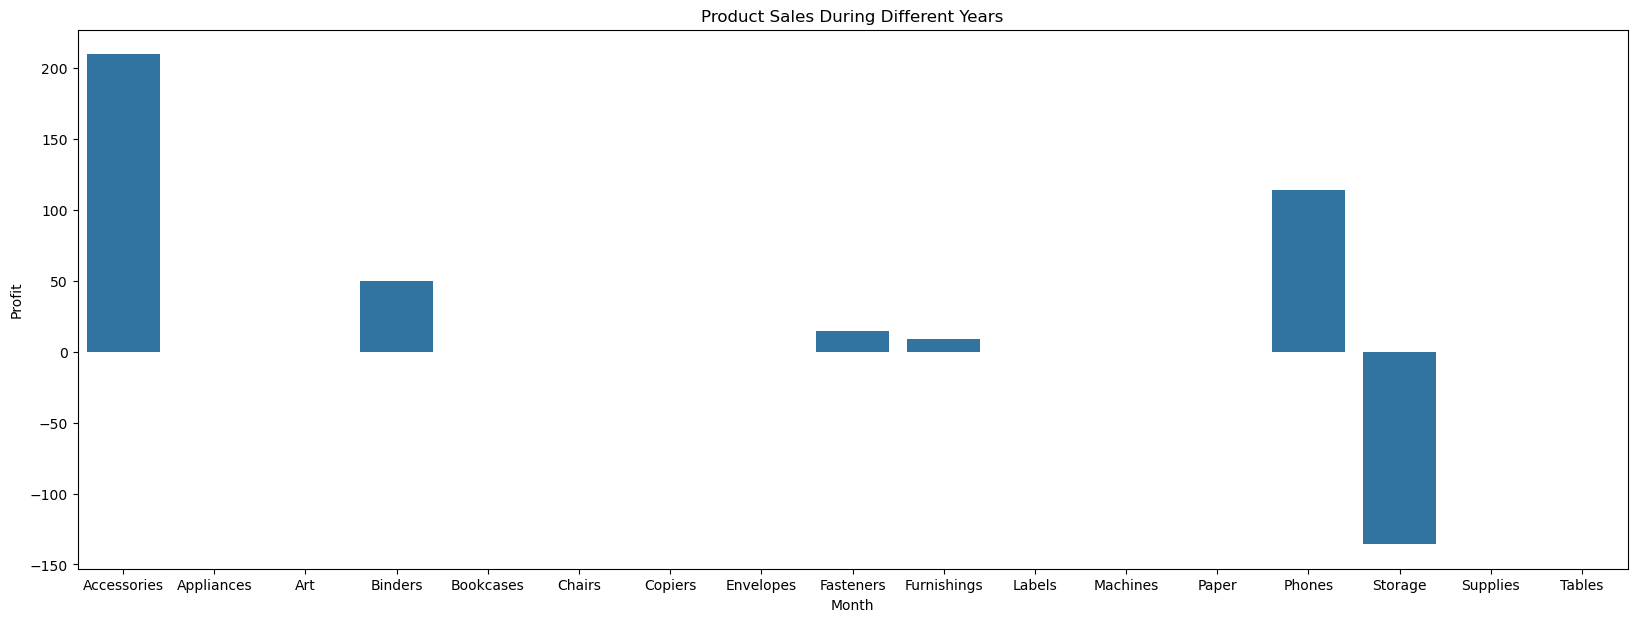

In [46]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data= Best, x='Sub-Category', y='Profit', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

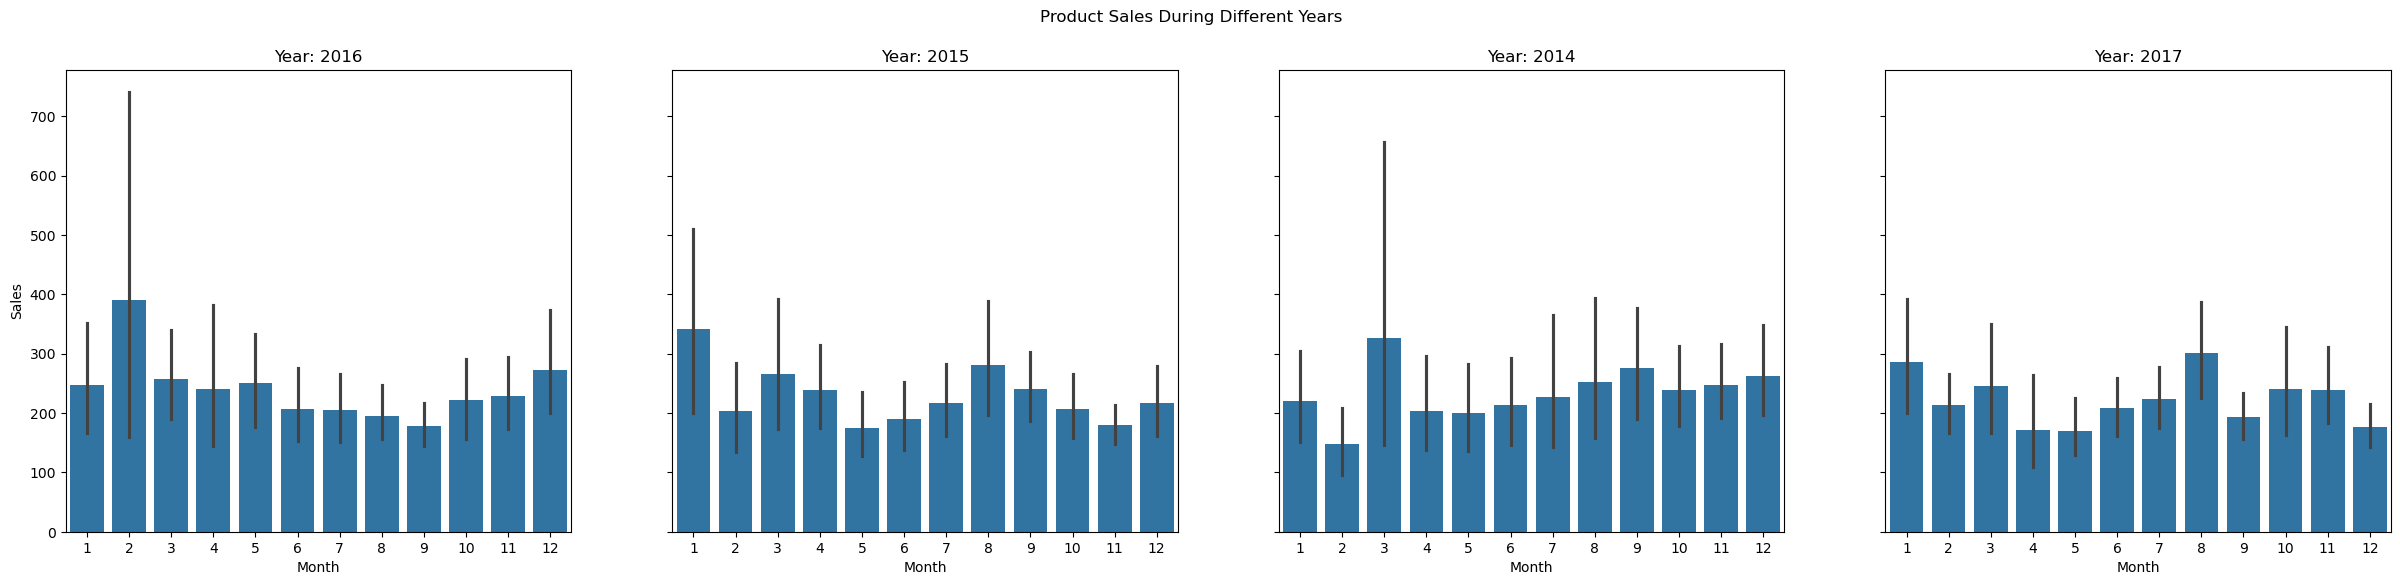

In [47]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6),  sharey=True)
fig.suptitle('Product Sales During Different Years')

for i, Year in enumerate(df1['Year'].unique()):
    year_data = df1[df1['Year'] == Year]
    sns.barplot(data=year_data, x='Month', y='Sales', ax=axes[i])
    axes[i].set_title(f'Year: {Year}')

plt.show()

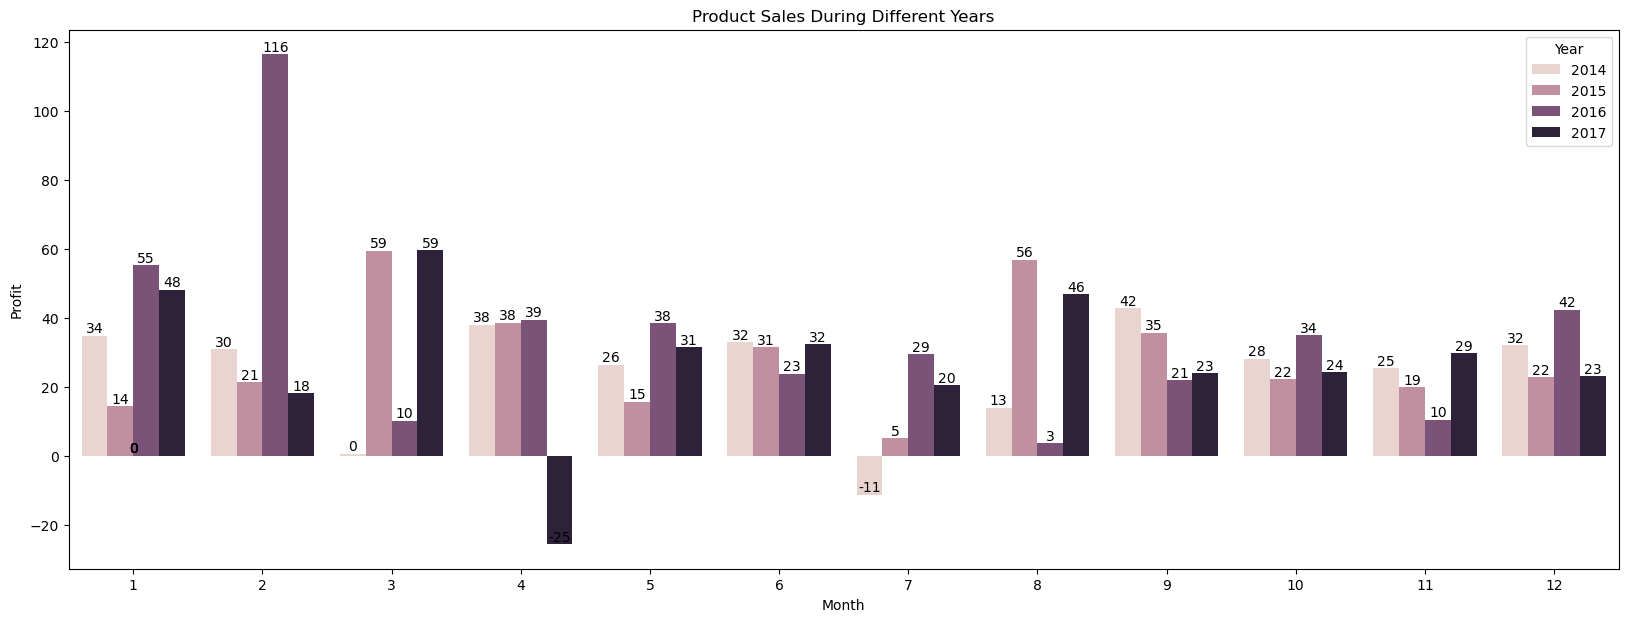

In [48]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Month', y='Profit', hue= 'Year', errorbar=None, ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

In [49]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Year', 'Category ID'],
      dtype='object')

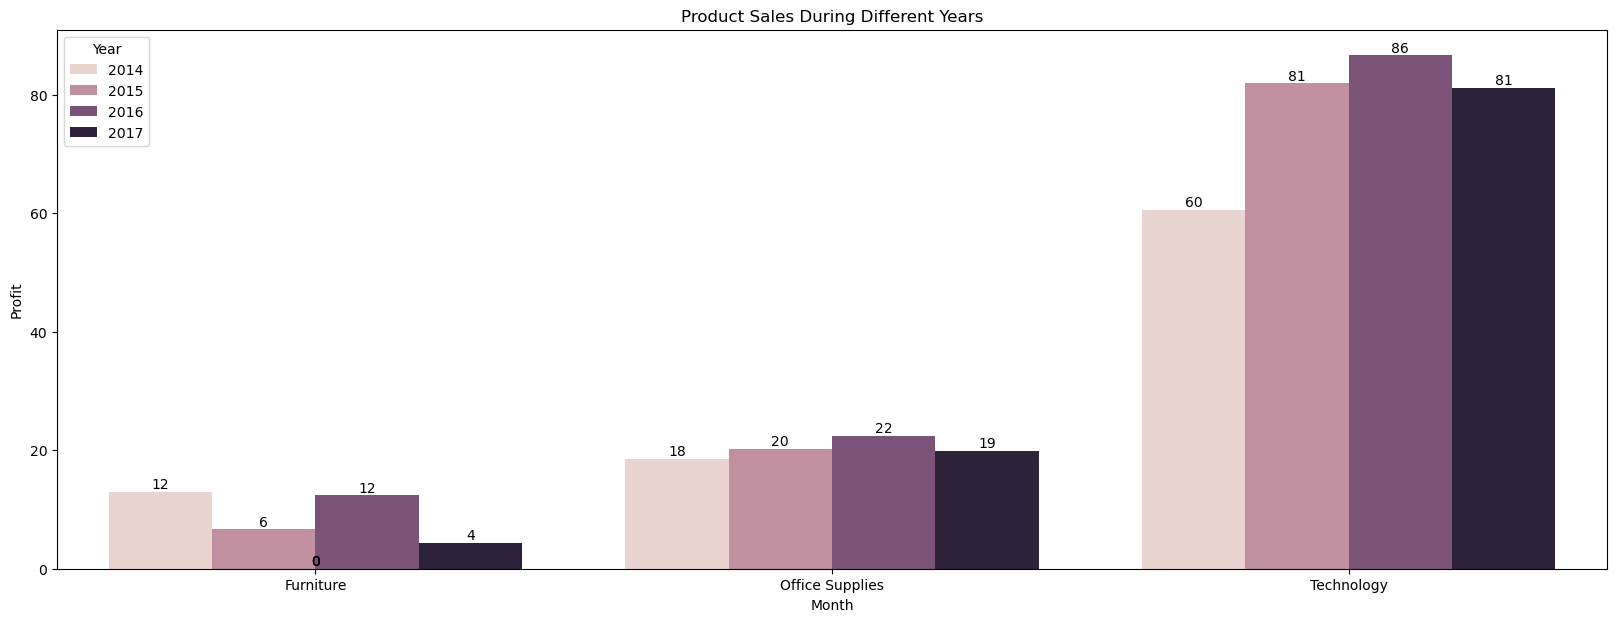

In [50]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Category', y='Profit', hue= 'Year', errorbar=None, ax=ax)
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height + 0.05, f'{int(height)}', ha='center', va='bottom')
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

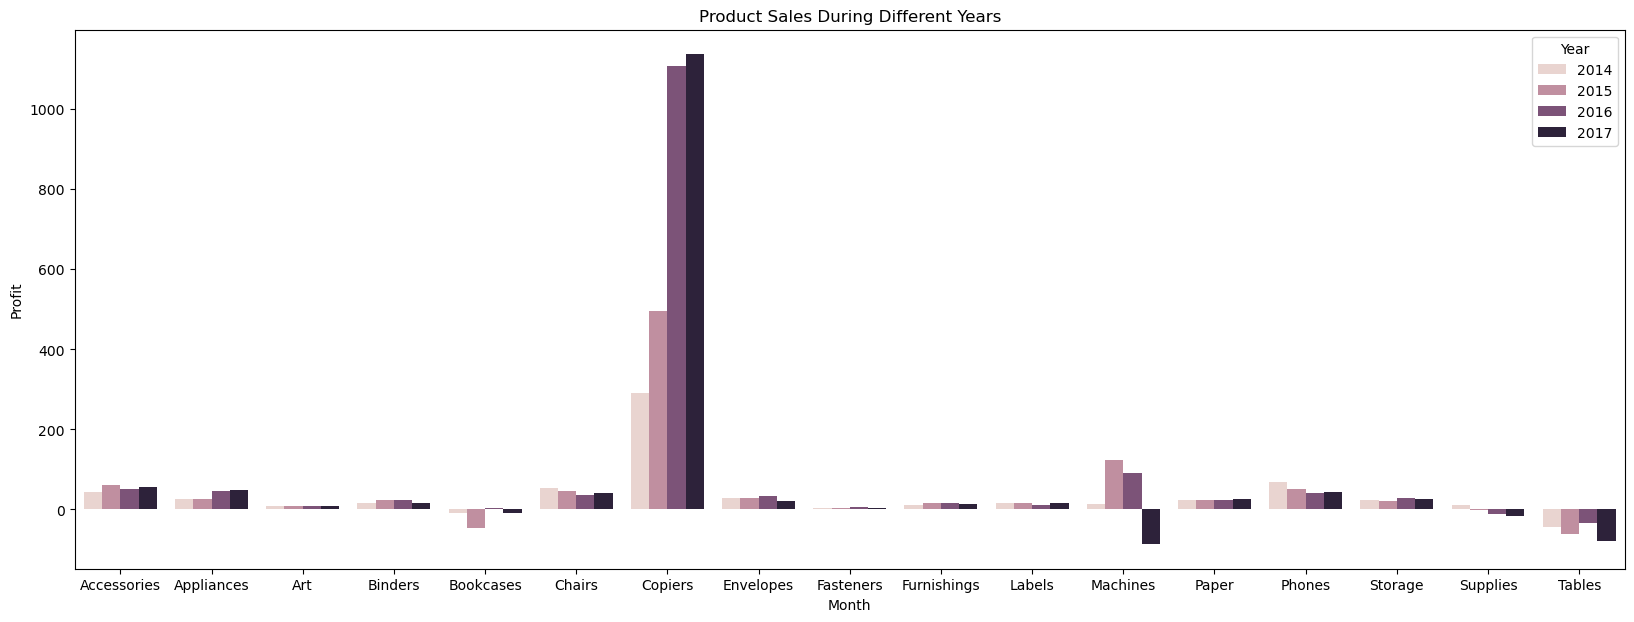

In [51]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Sub-Category', y='Profit', hue= 'Year', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

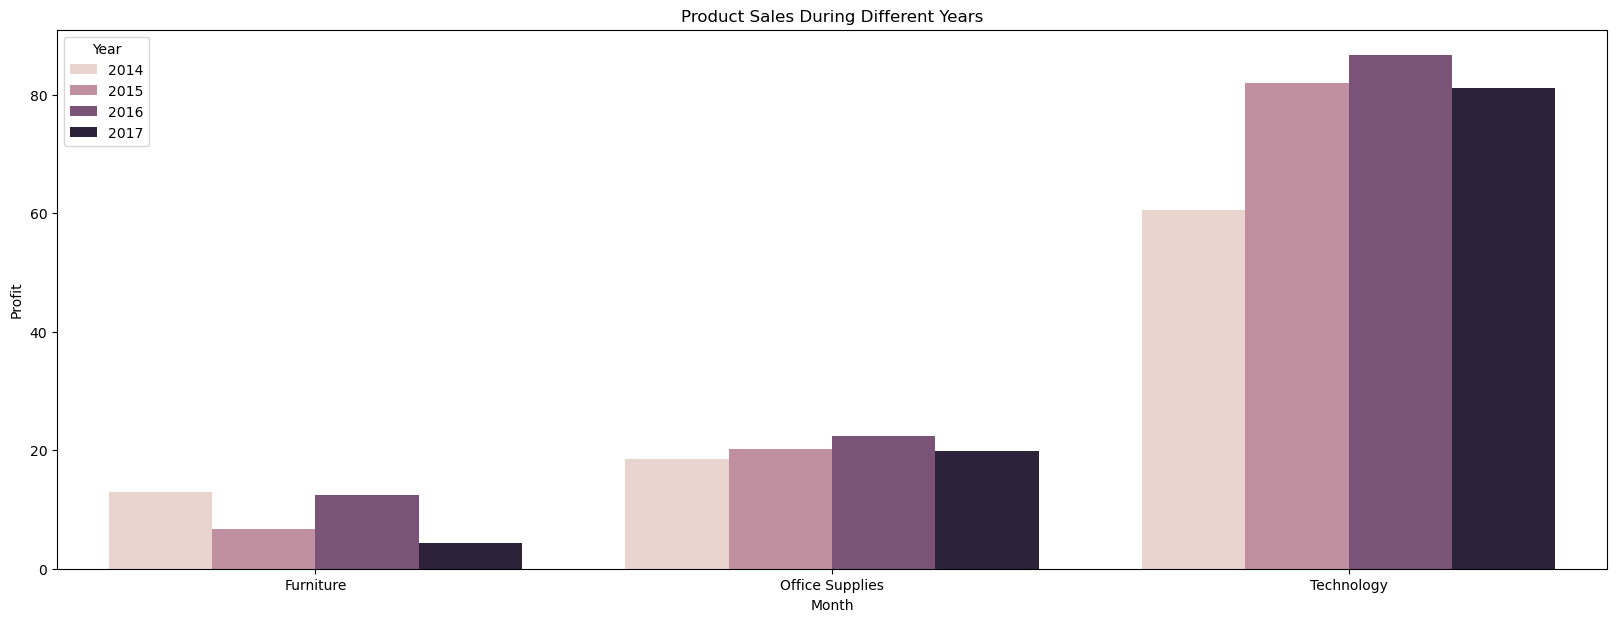

In [52]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Category', y='Profit', hue= 'Year', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

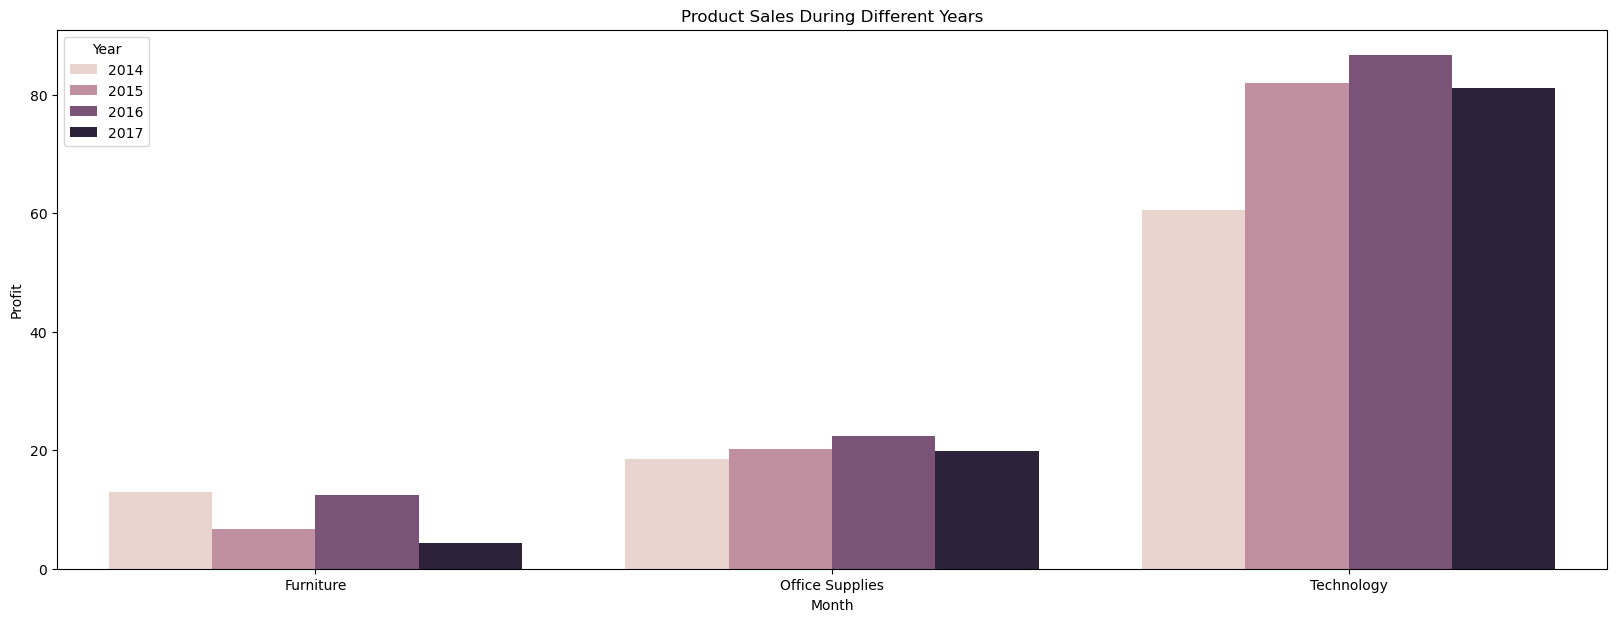

In [53]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Category', y='Profit', hue= 'Year', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

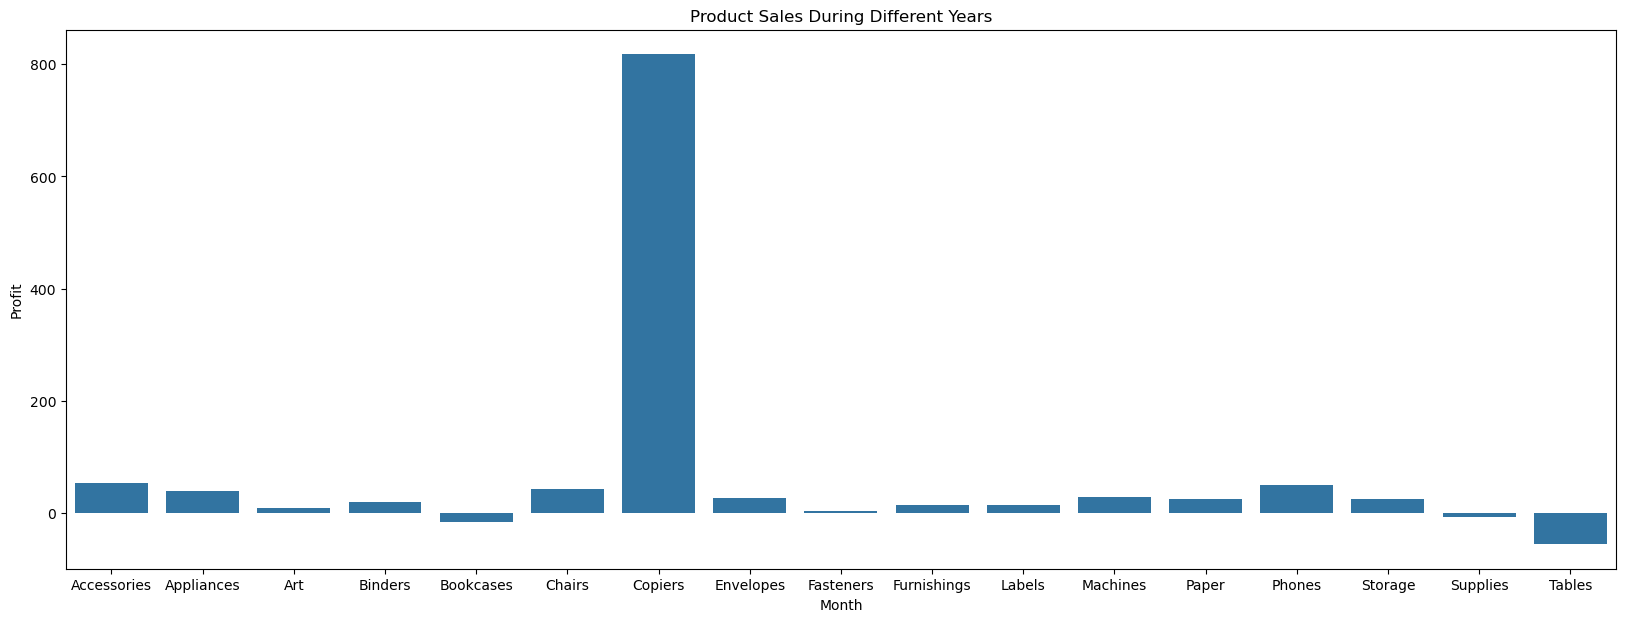

In [54]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x='Sub-Category', y='Profit', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

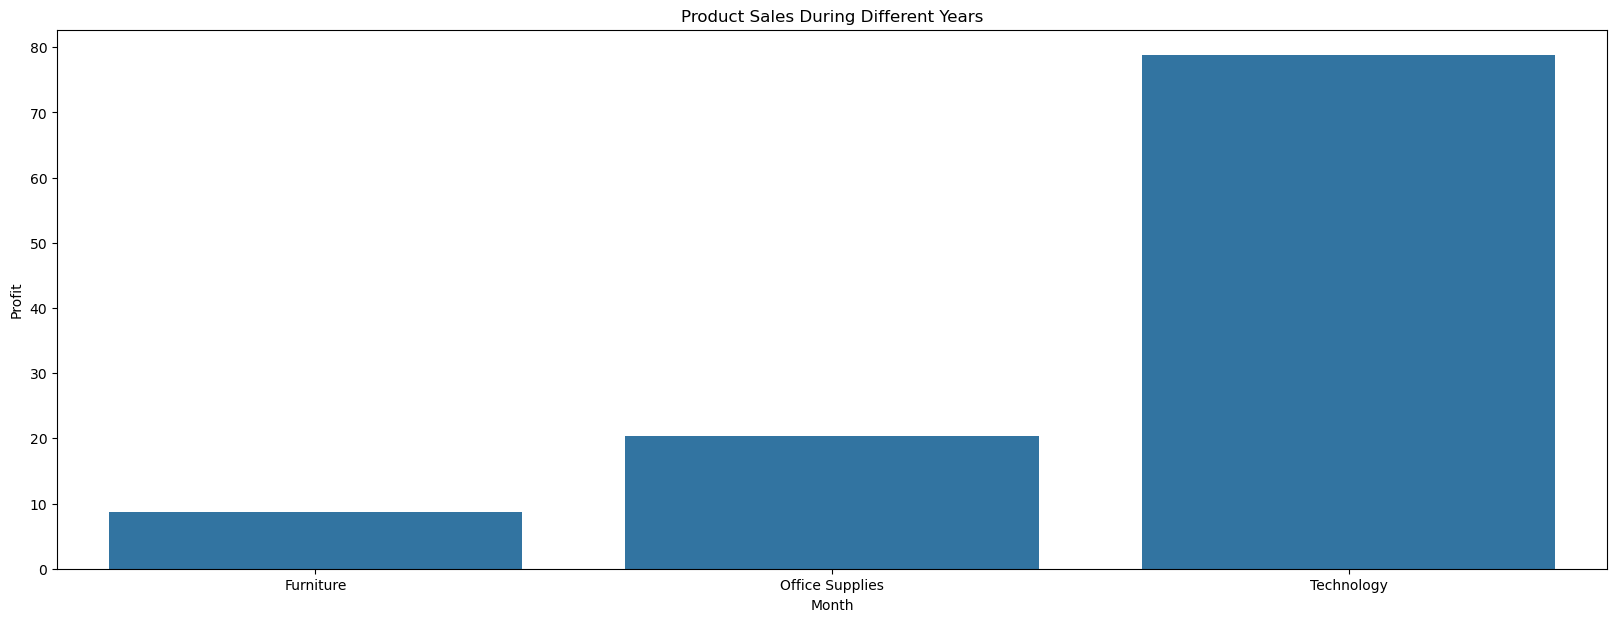

In [55]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=df1, x= 'Category', y='Profit', errorbar=None, ax=ax)
ax.set(title='Product Sales During Different Years')
ax.set_ylabel('Profit')
ax.set_xlabel('Month')
plt.show()

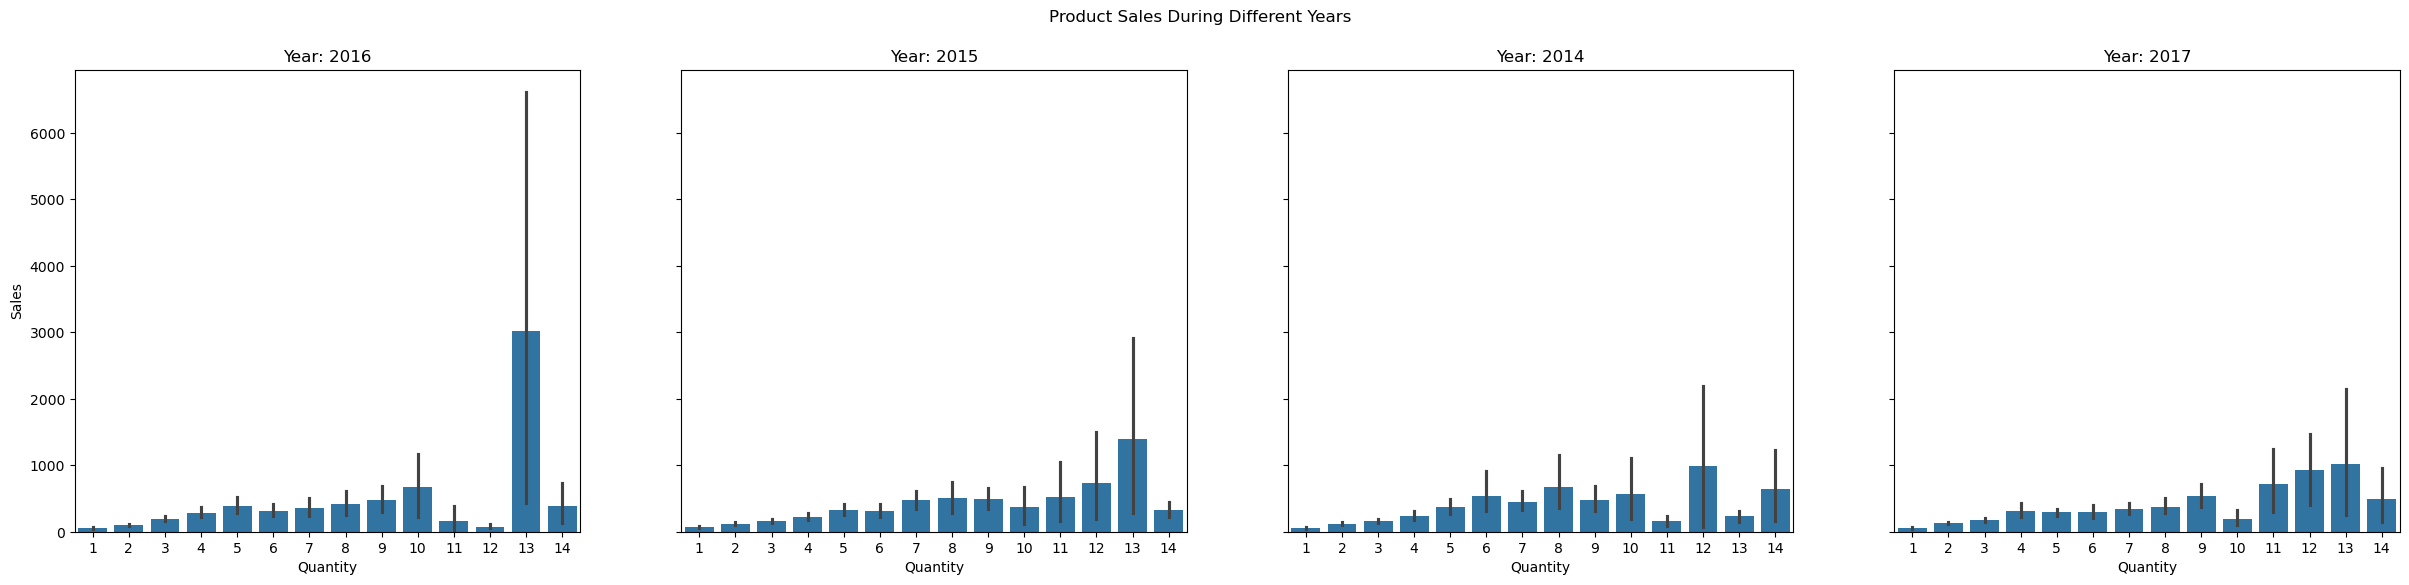

In [56]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6),  sharey=True)
fig.suptitle('Product Sales During Different Years')

for i, Year in enumerate(df1['Year'].unique()):
    year_data = df1[df1['Year'] == Year]
    sns.barplot(data=year_data, x='Quantity', y='Sales', ax=axes[i])
    axes[i].set_title(f'Year: {Year}')

plt.show()

## Download Csv file

In [ ]:
# # Save to CSV for Tableau
# df.to_csv('superstore_cleaned.csv', index=False)
# yearly_sales_pct_change.to_csv('yearly_sales_pct_change.csv', index=False)